# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [249]:

## make sure the following dependencies are installed, specifically geopy
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import requests
import scipy.stats
import random as rd
from citipy import citipy
import csv
import os

#to import keys without having them in my repo
import sys
sys.path.insert(1,'/Users/Trav/Desktop/Coding/GitHub_Repositories/API_PACKAGE')
import api_keys



## Generate Cities List

In [250]:

# ## generates 2 lists of random floats for latitude and longitude
# ### maybe I could generate a larger list and narrow it down by population size(whats my max, 5000????)
# samp_size = 1500
# lat_list = [round(rd.uniform(-90,90),2) for num in range(samp_size)]
# lon_list = [round(rd.uniform(-180,180),2) for num in range(samp_size)]

# city_name_list=[]
# country_code_list=[]
# ex_coor_list=[]

# #turns the keys and values from the world cities dict into lists
# new_world_keys=list(citipy.WORLD_CITIES_DICT.keys())
# new_world_values=list(citipy.WORLD_CITIES_DICT.values())

# # generating data in a for loop
# for y in range(samp_size):
#     #grabs the approximate latitude and longitutde
#     ap_lat=lat_list[y]
#     ap_lon=lon_list[y]
#     #use citipy functions to get the city name and country code
#     current_city=citipy.nearest_city(ap_lat,ap_lon)
#     city_name_list.append(current_city.city_name)
#     country_code_list.append(current_city.country_code)
#     # uses the new world lists to get the exact coordinates for the city
#     nwvi=new_world_values.index(current_city)
#     ex_coor_list.append(new_world_keys[nwvi])
 
# # turns the lists created in the for loop into a dataframe
# ## i might want to remove the 2 for list comprehensions below and do it in the for loop above
# coor_df= pd.DataFrame({
#     'Approximate Lat':lat_list,
#     'Approximate Lon':lon_list,
#     'City Name':city_name_list,
#     'Country Code': country_code_list,
#     'Exact Coordinates':ex_coor_list,
#     'Latitude':[i[0] for i in ex_coor_list],
#     'Longitude':[i[1] for i in ex_coor_list],
# })

# #removes dupliactes based on the exact coordinates
# coor_df=coor_df.drop_duplicates(subset=['Exact Coordinates'],keep='first')

# #trims down the dataframe to 500 if there are more 
# coor_df_len = len(coor_df['Approximate Lat'])
# if coor_df_len > 500:
#     coor_df.drop(coor_df.tail(coor_df_len-500).index,inplace=True)

# # coor_df.head()


### Perform API Calls and turn raw data into dataframe
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).
* Display the DataFrame

In [251]:

# ##sets up the query url for the lat/lon weather request #need to look into git ignore
# base_url = "http://api.openweathermap.org/data/2.5/weather?"

# coor_df['Temperature']=''
# coor_df['Humidity']=''
# coor_df['Cloudiness']=''
# coor_df['Wind Speed']=''

# for i,r in coor_df.iterrows():
#     #gets the lat and lon from the df
#     wea_coors = coor_df["Exact Coordinates"][i]
#     wea_lat=wea_coors[0]
#     wea_lon=wea_coors[1]
#     #send api to requestthe temperature, humidity, cloudiness, and wind speed 
#     query_url =f'{base_url}lat={wea_lat}&lon={wea_lon}&appid={api_keys.weather_api_key}&units=imperial'
#     wea_json = requests.get(query_url).json()
#     coor_df['Temperature'][i]=wea_json["main"]['temp']
#     coor_df['Humidity'][i]=wea_json['main']['humidity']
#     coor_df['Cloudiness'][i]=wea_json['clouds']['all']
#     coor_df['Wind Speed'][i]=wea_json['wind']['speed']

# coor_df.head(20)



### Convert Dataframe to csv
* Export the city data into a .csv.


In [252]:
# # #create a new folder and exports the dataframe

# def dataframe_to_csv(df):
#     current_directory=os.getcwd()
#     new_folder_path =os.path.join(current_directory,r'Export Folder')
#     if not os.path.exists(new_folder_path):
#         os.makedirs(new_folder_path)
#     csv_export_path = os.path.join(new_folder_path,'city_data.csv')
#     df.to_csv(csv_export_path,index=False)
# dataframe_to_csv(coor_df)

In [253]:
# ## import the csv file you just saved
# def import_path():
#     current_directory=os.getcwd()
#     new_folder_path =os.path.join(current_directory,r'Export Folder')
#     csv_export_path = os.path.join(new_folder_path,'city_data.csv')
#     return csv_export_path

# im_path=import_path()
# print(im_path)
# csv_imp_df=pd.read_csv(im_path,delimiter=',')
# csv_imp_df.head()

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [254]:
## creates a new dataframe, excluding humidity over 100
####### i don't like where this is placed considering total cities could be less than 500, i think I should drop the high humidity rows when im iterating through the dataframe(or after i iterate through it), that way my initial csv export is clean as well. or maybe i should change when I cut down to 500
print(len(csv_imp_df['Humidity']))
city_weather_df=csv_imp_df.loc[csv_imp_df['Humidity']<=100,:]
print(len(city_weather_df['Humidity']))

500
500


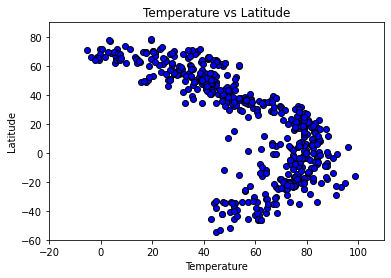

In [255]:
#### defines the plotting process as a function so it can be applied for each weather factor compared to latitude
def scatty(weathery):
    #set the x min and max and sets the data from the data frame as the x axis
    x_limit=round(city_weather_df[weathery].max()+(city_weather_df[weathery].max()*.1),-1)
    x_min=round((city_weather_df[weathery].min()-10),-1)
    x_axis=city_weather_df[weathery]

    # does the same as above for the y axis
    y_limit=round(city_weather_df['Latitude'].max()+(city_weather_df['Latitude'].max()*.1),-1)
    y_min=round((city_weather_df['Latitude'].min()-10),-1)
    y_axis = city_weather_df['Latitude']

    plt.scatter(x_axis,y_axis,marker='o',facecolors='blue',edgecolor='black')
    plt.ylim(y_min,y_limit)
    plt.xlim(x_min,x_limit)
    plt.title(weathery+" vs Latitude")
    plt.xlabel(weathery)
    plt.ylabel('Latitude')
    return plt.show()

scatty('Temperature')


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

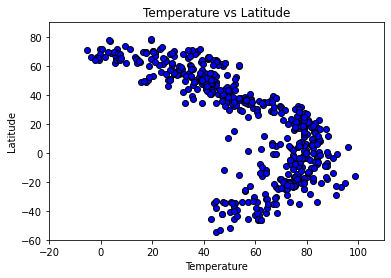

In [256]:
scatty('Temperature')
### need to write something to describe this plot

## Latitude vs. Humidity Plot

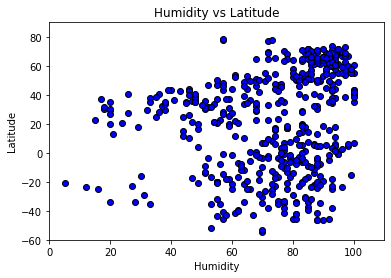

In [257]:
scatty('Humidity')
### need to write something to describe this plot

## Latitude vs. Cloudiness Plot

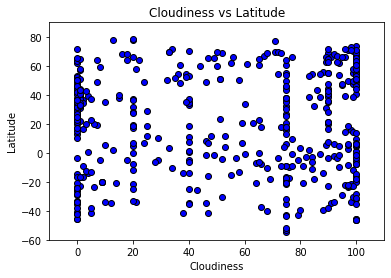

In [258]:
scatty('Cloudiness')
### need to write something to describe this plot
# mabe look at the mode her considering the vertical lines??????

## Latitude vs. Wind Speed Plot

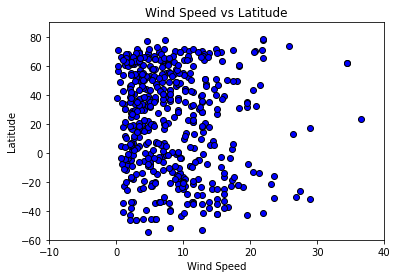

In [259]:
scatty('Wind Speed')
### need to write something to describe this plot

## Linear Regression

In [260]:
### maybe start off by grouping data into latitude greater than 0 and less than 0

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression